In [10]:
from useful_scit.imps import (pd,np,xr,za,mpl,plt,sns, pjoin,
                              os,glob,dt,sys,ucp,log, splot)
import cartopy.crs as crs

In [12]:
import flexpart_management.modules.constants as co
import flexpart_management.modules.flx_array as fa

In [13]:
path = '/proj/atm/saltena/runs/run_2019_05_15/wrf/'

In [14]:
files = glob.glob(path+'wrfout*d04*2017-12-31*')
files.sort()

In [15]:
TIME = 'Time'
PBLH = 'PBLH'
XTIME = 'XTIME'
LTIME = 'LOCAL TIME'

In [16]:
dso = ds = xr.open_mfdataset(files,concat_dim=TIME,combine='nested')
for ll in [co.XLAT,co.XLONG]:
    ds[ll] = ds[ll].mean(co.TIME)
ds[co.XLAT] = ds[co.XLAT].mean(co.WE).load()
ds[co.XLONG] = ds[co.XLONG].mean(co.SN).load()

In [17]:
ds[LTIME]=(ds[XTIME].to_pandas()-pd.Timedelta(hours=4)).to_xarray()

In [18]:
ds = ds.swap_dims({co.WE:co.XLONG,co.SN:co.XLAT,co.TIME:LTIME})

(-17.350427, -15.350427)

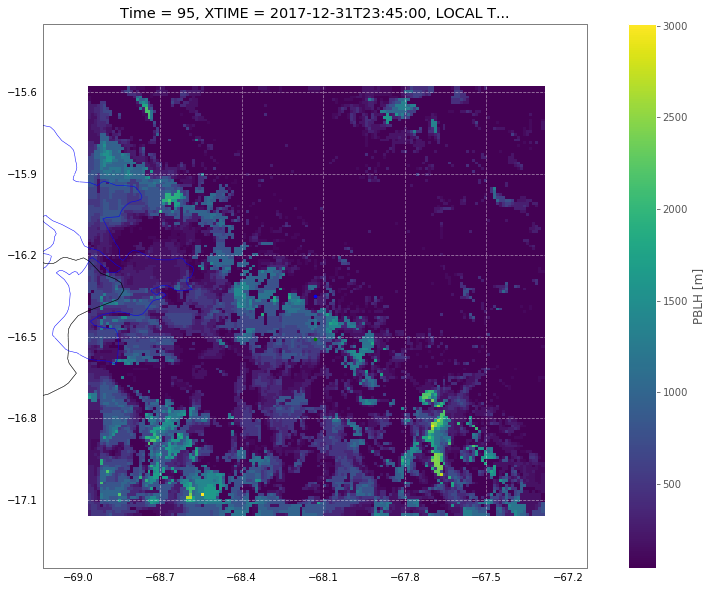

In [19]:
ax = fa.get_ax_lapaz()
ds[PBLH][{LTIME:-1}].plot(ax=ax,transform=crs.PlateCarree())
fa.add_chc_lpb(ax)
ax.set_xlim(co.CHC_LON-1,co.CHC_LON+1)
ax.set_ylim(co.CHC_LAT-1,co.CHC_LAT+1)

In [20]:
__ds = ds[PBLH]#[{co.TIME:-1}]

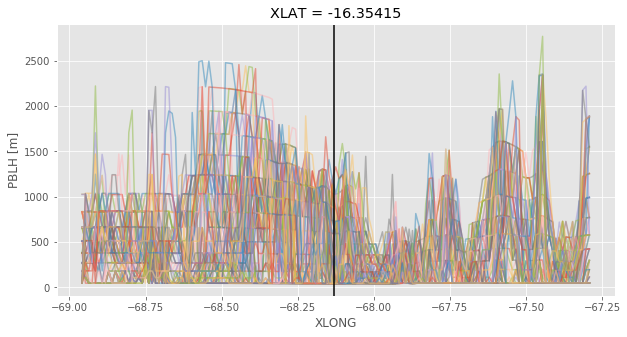

In [21]:
_,ax = splot(figsize=(10,5))
_ds = __ds.sel({co.XLAT:co.CHC_LAT},method='nearest')
_ds = _ds.plot.line(ax=ax,hue=LTIME,add_legend=False,alpha=.5)
ax.axvline(co.CHC_LON,color='k')

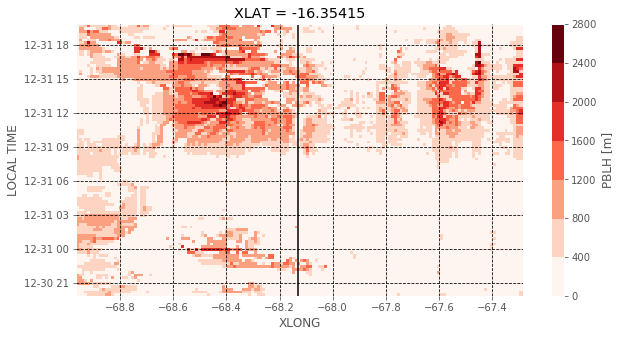

In [145]:
_,ax = splot(figsize=(10,5))
_ds = __ds.sel({co.XLAT:co.CHC_LAT},method='nearest')
_ds = _ds.plot(ax=ax,levels=10,cmap=plt.get_cmap('Reds'))
ax.axvline(co.CHC_LON,color='k')
ax.grid(True,linestyle='--',color='k')
ax.set_axisbelow(False)

In [148]:
_ds = __ds.sel({co.XLAT:co.CHC_LAT,co.XLONG:co.CHC_LON},method='nearest')

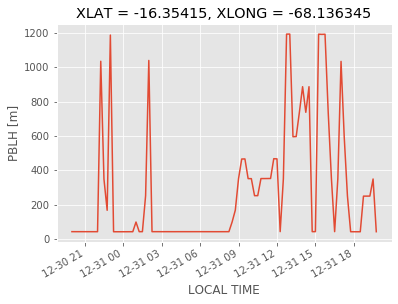

In [150]:
_ds.plot()

In [152]:
_ds.min().load()

<xarray.DataArray 'PBLH' ()>
array(44.62256, dtype=float32)
Coordinates:
    XLAT     float32 -16.35415
    XLONG    float32 -68.136345

In [154]:
ll=list(ds.variables)
ll.sort()

In [158]:
_ds = ds['TKE_PBL'].sel({co.XLAT:co.CHC_LAT,co.XLONG:co.CHC_LON},method='nearest')

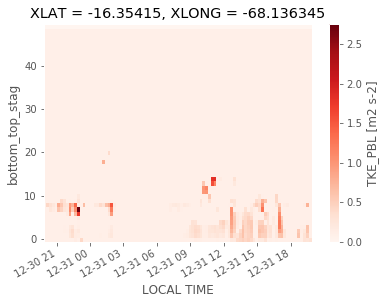

In [161]:
_ds.plot(x=LTIME,cmap=plt.get_cmap('Reds'))

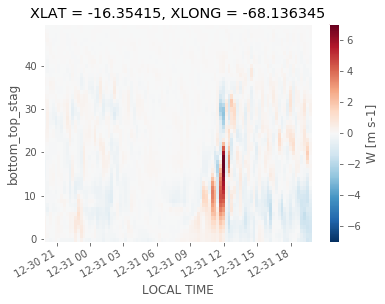

In [168]:
_ds = ds['W'].sel({co.XLAT:co.CHC_LAT,co.XLONG:co.CHC_LON},method='nearest')
_ds.plot(x=LTIME,cmap=plt.get_cmap('RdBu_r'))

In [176]:
file_objs = dso._file_obj.file_objs

In [181]:
fds = []
for f in file_objs:
    fds.append(f.ds)

In [201]:
z = wrf.getvar(fds,'wa')
z

<xarray.DataArray 'wa' (bottom_top: 49, south_north: 150, west_east: 153)>
array([[[-0.018474, -0.018575, ...,  0.051077,  0.051583],
        [-0.016205, -0.013031, ...,  0.034716,  0.058396],
        ...,
        [ 0.05208 ,  0.026403, ...,  0.017713,  0.031059],
        [ 0.059268,  0.041391, ...,  0.017977,  0.017071]],

       [[-0.066681, -0.066028, ...,  0.047494,  0.066744],
        [-0.059876, -0.052877, ...,  0.027261,  0.068518],
        ...,
        [ 0.047792,  0.047965, ...,  0.051564,  0.113028],
        [ 0.058062,  0.057922, ...,  0.064514,  0.07741 ]],

       ...,

       [[ 0.026223,  0.024132, ...,  0.057854,  0.058898],
        [ 0.036509,  0.037556, ...,  0.060485,  0.053659],
        ...,
        [ 0.012881,  0.015542, ..., -0.017599, -0.01466 ],
        [ 0.015666,  0.015542, ..., -0.017273, -0.014995]],

       [[ 0.012212,  0.010027, ...,  0.020951,  0.021668],
        [ 0.016199,  0.015829, ...,  0.019539,  0.019085],
        ...,
        [ 0.003278,  0.00394

In [202]:
_dds = wrf.vinterp(fds[0],z,'ght_msl',[0,1,2,3,4,5,6])

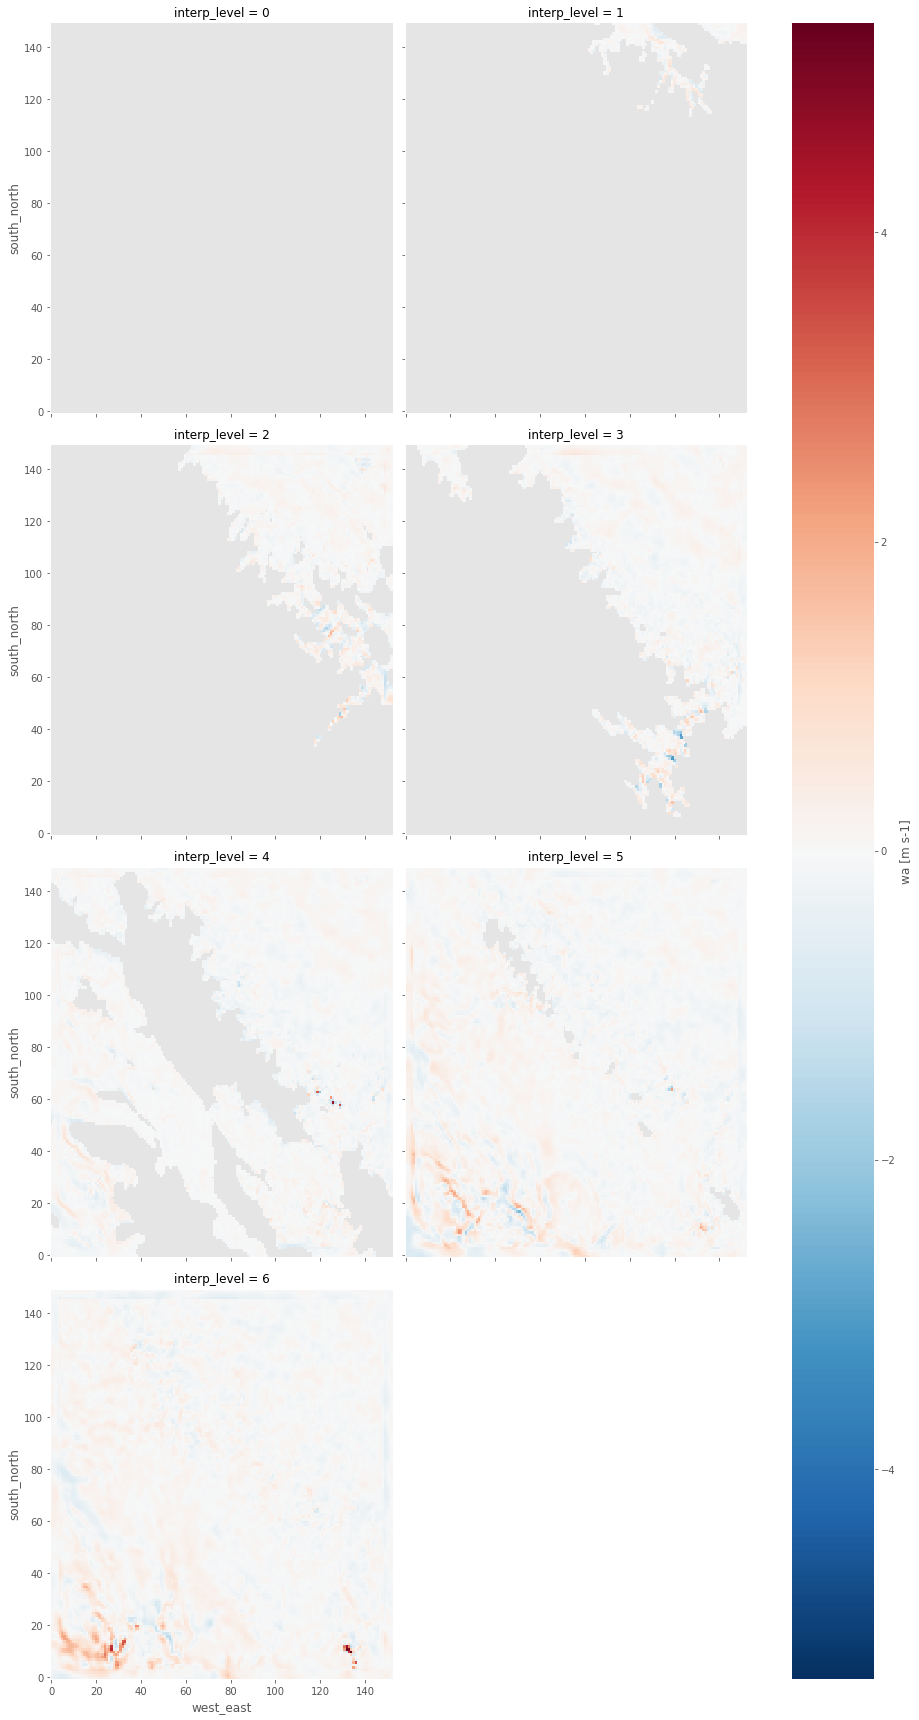

In [206]:
_dds.plot.pcolormesh(col='interp_level',col_wrap=2,size=6)

In [207]:
base_fun = xr.DataArray.plot.pcolormesh

AttributeError: 'property' object has no attribute 'pcolormesh'

In [212]:
_dds.plot.pcolormesh

<bound method pcolormesh of <xarray.plot.plot._PlotMethods object at 0x7f8ff5c21390>>

In [220]:
base_pcolormesh = xr.plot.pcolormesh

In [22]:
_dds.sum('interp_level').plot.pcolormesh()

NameError: name '_dds' is not defined